In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# The usual notebook preferences

%config InlineBackend.figure_format = 'svg'

import numpy
import sys
import matplotlib.pyplot as plt

sys.path.append('..')
from helper_functions import *

HTML(toggle_code("import functions"))

In [5]:
set_notebook_preferences()

## Logistic classification: Understanding the model

In this section we're going to consider an approach to classification that, i) employs a simple probabilistic model to encode the relationship between inputs and outputs which is controlled by a set of parameters, and ii) estimates the parameters of the model from data using the maximum-likelihood approach. In this notebook we'll describe the model and consider toy examples to understand its properties. In the [next notebook](classification_logistic_regression_ML_fitting.ipynb) we'll consider maximum-likelihood fitting.

The model considered initially will be called __linear__ as it produces probability contours that lie on straight lines in the input space and consequently linear boundaries between classes. We will then generalise this model to capture non-linear contours using basis functions. The development of logistic regression will therefore parallel the development for [linear regression](). 

For simplicity we will initially consider __binary classification__ where the outputs belong to two classes (e.g. classifying email according to whether it is spam or not). Later will we generalise the model to handle __mulitiple classes__. 


###  The Logistic Classification Model

Each datapoint comprises an input $\mathbf{x}_n$ and an output value $y_n$. The outputs indicate the binary class of the $n^{th}$ datapoint: $y_n = 0$ when the datapoint belongs to the first class (e.g. an email from a contact in your address book) and $y_n = 1$ when it belongs to the second class (e.g. an email from a spammer). 

The model specifies the probability that a datapoint at input location $\mathbf{x}_n$ takes an output value $y_n = 1$ using parameters $\mathbf{w}$. The model comprises two steps. 

First the model linearly transforms the inputs to produce a scalar real-valued activation:

$$
a_n = \mathbf{w}^\top \mathbf{x}_n = \sum_{d=1}^D w_d x_{n,d}.
$$

Note here that an offset or bias term can easily be incorporated by augmenting the inputs with a constant input $\mathbf{x} = [x_0, x_1,...,x_D]^\top = [1, x_1,...,x_D]$ so that $a_n = \mathbf{w}^\top \mathbf{x}_n = \sum_{d=0}^D w_d x_{n,d} = w_0 + \sum_{d=1}^D w_d x_{n,d}$. For this reason, we can suppress biases in what follows. 

Second, the model passes the activation through a non-linear logistic function

$$
p(y_n = 1 | \mathbf{x}_n, \mathbf{w}) = \sigma(a_n)  = \frac{1}{1 + \text{exp}({-\mathbf{w}_n^\top \mathbf{x}})} .
$$

### Understanding the Logistic Classification Model

Let's understand the two steps in the logistic classifiction model. The first step is the only one that includes parameters. If we break the inputs into components that are parallel and perpedicular to the weight $\mathbf{w}$ so that $\mathbf{x} =  \mathbf{x}_\parallel + \mathbf{x}_\bot$, then it is clear that the linear stage retains only the parallel component of the input. In other words, the weights define a direction in input space onto which the input is projected. 

Below we visualise the activation for a two-dimensional input space as we change the weights. We do not use a bias. The weights are a two-dimensional vector. To begin with we rotate the direction of the weight which changes the orientation of the activation function in the input space. Then we change the magnitude of the weight vector, which changes the slope of the activation function.

** Insert here plots here very like input output function of single neuron, but without the logistic i.e. contours of $a_n = \mathbf{w}^\top \mathbf{x}_n$  **


The second stage maps the activation - which is a real-valued linear projection of the input - to a valid probability with a value between $0$ and $1$. Here's a plot of the logistic function $\sigma(a) = \frac{1}{1 + \text{exp}(-a)}$ which is monotonically increasing, takes the value 1/2 when $a = 0$, and asymptotes to zero for large input magnitudes. 

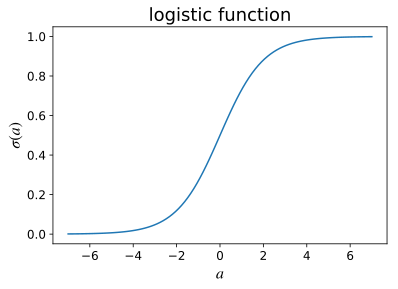

In [11]:
a = np.linspace(-7,7,100)

p = 1/(1+np.exp(-a))

plt.plot(a,p)

beautify_plot({"title":"logistic function", "x":"$a$", "y":"$\sigma(a)$"})
plt.show()

Now let's compose the two stages and visualise the input-output function of logistic classification, $p(y_n = 1 | \mathbf{x}_n, \mathbf{w})$, as we change the direction and magnitude of the weights in our two dimensional example. The direction of the weights encodes the orientation of the boundary between the two classes and the magnitude encodes the steepness of the boundary.

** Insert here plots of input output function of single neuron **

Each of the frames of the animation above shows a possible input-output function that the model can implement. Here's another way to visualise the family of implementable functions. We consider the **weight space** of model: that is, any possible setting of the 2D weights. For selected points in this space we plot the input-output function. Again, moving around a circle centred on the origin changes the orientation of the input-output function. Moving along a line passing through the origin changes the steepness of the function. 

** Add plot of weight space of single neuron **

The goal of learning is to select from amongst these functions the one(s) that are compatible with observed data.

** further reading box **


### A brief note on terminology

In the literature, this classification model is sometimes referred to as [*logistic regression*](https://en.wikipedia.org/wiki/Logistic_regression). This can be misleading as it obfiscates the fact that it is a model for *classification*. The model is also sometimes called a 'single neuron' as it is the simplest example of a neural network, see chapter 39 of [David MacKay's textbook](http://www.inference.org.uk/itprnn/book.pdf) for more details.

## Summary 

1. In the binary logistic regression model the probability of an input belonging to class 1 is specified through an input-ouput function that comprises a linear projection of the input and a logistic function, $
p(y_n = 1 | \mathbf{x}_n, \mathbf{w}) = \sigma(a_n)  = \frac{1}{1 + \text{exp}({-\mathbf{w}_n^\top \mathbf{x}})} .
$. 

2. This input-output function is a soft-step function whose orientation is set by the the direction of the weight vector $\hat{\mathbf{w}} = \mathbf{w}/|\mathbf{w}|$ and whose steepness is set by the magnitude of the weights $|\mathbf{w}|$. 

3. Learning will select a setting(s) of the weights, equivalently a direction and steepness of the input-output function, that is compatible with the observed data.

In the next [section](classification_logistic_regression_ML_fitting.ipynb) we will look at how to learn the parameters of the model using maximum likelihood estimation.

### Questions

1. Alice has crowdsourced a binary classification dataset by showing an input $\mathbf{x}_n$ to a labeller who provides a binary label $y_n$ to yield a dataset $\{ \mathbf{x}_n, y_n\}_{n=1}^N$. Due to inadequate financial incentive, the labelers are not well motivated and lose concentration 1% of the time, picking a label uniformly at random in these cases. Is logistic classification a suitable model for these data? If not, suggest a modification that will improve it. 

<details>
<summary>Answer</summary>
<div class="row">
  <div class="column">
 The standard binary logistic regression model described above is not suitable: as the magnitude of the inputs increases, the model's predictions will asymptote to one or zero. I.e. when $|\mathbf{x}| \rightarrow 0$ then $p(y_n = 1 | \mathbf{x}_n, \mathbf{w}) \rightarrow 0 \;\ \text{or} \;\; 1$. That is, the model becomes certain about the output label. However, for Alice's dataset, the model should never be certain due to the **label noise**. 
      
      <br><br>
      One way to fix the model is to introduce a binary variable $c_n$ that takes a value $1$ when the labeller loses concentration, and a value $0$ if they do not. We know from the information in the question that $p(c_n = 1) = 0.01$. Now, consider the classification step. If the labeller has not lost concentration, we can employ logistic classification as normal:
      
      $$p(y_n = 1 | \mathbf{x}_n, \mathbf{w},c_n=0) = \frac{1}{1 + \text{exp}({-\mathbf{w}_n^\top \mathbf{x}})}$$
      
      If they have lost concentration, the labeller will guess so 
      
      $$p(y_n = 1 | \mathbf{x}_n, \mathbf{w},c_n=0) = 1/2$$
      
      Now we can marginalise out the concentration variable using the sum rule to recover an appropriate input-output function:
      
      $$ p(y_n = 1 | \mathbf{x}_n, \mathbf{w})  = p(c_n=0) p(y_n = 1 | \mathbf{x}_n, \mathbf{w},c_n=0) + p(c_n=1) p(y_n = 1 | \mathbf{x}_n, \mathbf{w},c_n=0) $$
      
      Substituting in values yields
      $$p(y_n = 1 | \mathbf{x}_n, \mathbf{w},c_n=0) = 0.99 \times \frac{1}{1 + \text{exp}({-\mathbf{w}_n^\top \mathbf{x}})} + 1/2 \times 0.01$$
      
      Now the model asymptotes to 0.005 or 0.995. This accounts for the fact that when the labeller guess in these limiting cases, they will still get the answer correct half of the time. 
      
  </div>
</div>
</details>

2. Bob has the dataset shown below and applies the following binary logistic classification model:

$$p(y_n = 1 | x_n, \mathbf{w},c_n=0) = \frac{1}{1 + \text{exp}(-w_1 x - w_0)} $$

  Will any setting of $w_0$ and $w_1$ result in a good model for these data? If not, how could the model be extended to better handle the data?

<img src="1d-non-linear-model.svg" alt="Snow" style="width:80%; float: center; padding: 0px; padding : 20px">


<details>
<summary>Answer</summary>
<div class="row">
  <div class="column">
  As we move from right to left across the input space the data initially belong to class 1, then class 0, then class 1 again and finally back to class 0.     
      
Let's contrast this behvious to the model. The linear logistic classification model will fit a logistic function to this data with $w_0$ determining the shift of the function and $w_1$ the steepness. As the logistic function is monotonically increasing, it can only handle 1D datasets that start with one class and end with another as we traverse the input space. 
      <br><br>
      One way to improve the model would be to include non-linear basis functions. For example, a set of Gaussian basis functions with centres spread across the input domain would work well. For more about these models see the notebook on [non-linear logistic classification](classification_non-linear.ipynb).
      
  </div>
</div>
</details>

3. Chris has the binary classification dataset shown below and would like to predict the output at a new unseen input location. She decides to treat the task as a **regression problem** using linear regression to fit the data. In order to make predictions, she computes the prediction from linear regression and applies a threshold: if the prediction is greater than 1/2 she predicts class 1 and if it is less than 1/2 she predicts class 0. Predict how the method will perform?

<img src="1d-regression-classification-q.svg" alt="Snow" style="width:80%; float: center; padding: 0px; padding : 20px">



<details>
<summary>Answer</summary>
<div class="row">
  <div class="column">
  Treating a classification problem with binary outputs as if it were a regression problem with  real valued outputs can perform very poorly. In this case the **classes are imbalanced**: there are more of class 0 than of class 1. When fitting the straight line to these data, there are many more contributions from class 0 than class 1. So the straight line tries to model class 0, taking the hit on the small number of data from class 1. In the limit where almost all the data belong to the 0 class, the fit would be a horizontal line $y(x) = 0$. The result here is that the fit will end up miss classifying half of the class 1 training data, which will presumably lead to poor generalisation. Fitting logistic classification would perform much more sensibly in this case. 
      
      
      
      <img src="1d-regression-classification.svg" alt="Snow" style="width:80%; float: center; padding: 0px; padding : 20px">
      
  </div>
</div>
</details>